# Qiskit Setup 10Dec2025! <a id="Setup"></a>
All Pre Setups
Install Qiskit (I am using the qiskit and grader setup from QSS code. That has qiskit>2.1 and works for IBM if you have Python>3.11.
It has saved me loty of import etc issues
 

<div class="alert alert-block alert-warning"> 
    
⚠️ **Note:**  Install Qiskit (I am using the qiskit and grader setup from QSS code. That has qiskit>2.1 and works for IBM if you have Python>3.11. It has saved me loty of import etc issues

In [1]:
from platform import python_version
print(python_version())

3.11.13


In [2]:
#Needed for grading now after summer school before other code is run.
%set_env QC_GRADING_ENDPOINT=https://qac-grading.quantum.ibm.com
%set_env QC_GRADE_ONLY=true

env: QC_GRADING_ENDPOINT=https://qac-grading.quantum.ibm.com
env: QC_GRADE_ONLY=true


In [3]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"


  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/wsuser/pip-install-v814jl4i/qc-grader_ebae249b42b145e6914d10cc7524c7b2
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/wsuser/pip-install-v814jl4i/qc-grader_ebae249b42b145e6914d10cc7524c7b2
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 6e0ab831d1945987a5e64021e4ef6e000116009c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [4]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.2
Grader version: 0.23.0


You should have Qiskit version `>=2.0.0` and Grader `>=0.22.12` (if you are using it). If you see a lower version, you need to reinstall and restart the kernel.

In [5]:
# Save your API key to track your progress and have access to the quantum computers
# replace required CRN below

your_api_key = "8t9TywYk-M0jyPhm_3yCJxV3f8YyZpd4HrgMs8XVlmK9" #my KP_Quantum_API_Key
your_crn = "crn:v1:bluemix:public:quantum-computing:eu-de:a/10c8bd640eb74c76b9615eb7fbd7c50d:b81706fb-dc8a-457e-a997-7a0a2309150d::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="kp-2025",
    overwrite=True,
)

In [6]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService

# Check that the account has been saved properly
service = QiskitRuntimeService(name="kp-2025")
service.saved_accounts()

{'kp-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '8t9TywYk-M0jyPhm_3yCJxV3f8YyZpd4HrgMs8XVlmK9',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/10c8bd640eb74c76b9615eb7fbd7c50d:b81706fb-dc8a-457e-a997-7a0a2309150d::',
  'verify': True,
  'private_endpoint': False}}

# Generic Imports if any

In [7]:
# Generic Imports if any

# 

# Setup backend as required


To execute a quantum circuit on a quantum computer using Qiskit, we first need to define the quantum backend. We could manually select a specific quantum computer we want to use out of the ones available from IBM Quantum. However, sometimes it is more convenient to select the machine that is least busy at the moment to ensure a fast execution. That's where the method `least_busy` is helpful. Also remember to specify any parameters required in the backend.

In [8]:
# Get a backend using the service defined above (safer to specify the service again here)
# - specify any parameters required

############ REAL BAckends - Specify as needed
service = QiskitRuntimeService(name="kp-2025")
# Get all available backends
backends = service.backends()
print(f"All backends ", backends)
# backend = service.backend("ibm_sherbrooke") # Replace with the desired backend name
# backend = service.least_busy(operational=True, simulator=False) #no extra params
backend = service.least_busy(min_num_qubits=150, use_fractional_gates=True, operational=True, simulator=False) #with extra params

############ LOCAL SIMULATORS - (e.g., AerSimulator):
# backend = AerSimulator() # For the default Aer simulator
# backend = AerSimulator(method='statevector') # Or specify a different Aer simulator
############ FAKE BAckends - import and use the fake backend required # (useful for quick local testing with specific device properties)
#from qiskit_ibm_runtime.fake_provider import FakeManhattan
#backend = FakeManhattan()
############

print(f"We are using the {backend.name} quantum computer")

All backends  [<IBMBackend('ibm_strasbourg')>, <IBMBackend('ibm_aachen')>, <IBMBackend('ibm_brussels')>]
We are using the ibm_aachen quantum computer


# 1. Introduction 

## 1.1 Objective of Use Case

The objective of this Use Case is to < provide a brief >

(eg. learn the basics and general workflow of quantum chemistry calculations. You will also learn about a useful hybrid quantum-classical algorithm called Sample-based Quantum Diagonalization (SQD) algorithm. SQD is a classical post-processing technique which acts on samples obtained from a quantum circuit after execution on a QPU. It is useful for finding eigenvalues and eigenvectors of quantum operators, such as the Hamiltonian of a quantum system, and uses quantum and distributed classical computing together. )


## Imports

Specific Installs and Imports if any

In [9]:
#%pip install pyscf
#%pip install ffsim
#%pip install qiskit_addon_sqd

In [10]:
# Import common packages first
##import numpy as np##
##from math import c#omb
##import warning#s
#import pyscf#
#import matpl#otlib.pyplot as plt
#import pickl#e#
#from functool#s import partial#

# Import qiskit classes
#from qiskit import QuantumCircuit, QuantumRegister
#from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit.visualization import plot_gate_map
#from qiskit_addon_sqd.fermion import SCIResult, diagonalize_fermionic_hamiltonian, solve_sci_batch

# Import qiskit ecosystems
#import ffsim
#from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
#from qiskit_ibm_runtime import SamplerOptions

# Import grader
#from qc_grader.challenges.qgss_2025 import (
#    grade_lab3_ex1, 
#    grade_lab3_ex2, 
#    grade_lab3_ex3,
#    grade_lab3_ex4,
#    grade_lab3_ex5
#)

In [11]:
# Use Case code steps START

In [15]:
# Use Case code steps END

The SQD workflow is depicted in the following diagram:


Fig 8. A diagram showing the SQD workflow

SQD is known to work well when the target eigenstate is sparse: the wave function is supported in a set of basis states $\mathcal{S} = \{|x\rangle \}$ whose size does not increase exponentially with the size of the problem.

### Configuration recovery loop 1: Recover the configuration

The first step in the configuration recovery loop is to recover the configuration. In other words, error mitigation is performed in this part.

If you run the quantum circuit that is the LUCJ ansatz built above on a quantum computer, you will get a bitstring and its count number as shown in the figure on the lower left. Because current noisy quantum computers give the result with the errors. Since the particle number of "spin-$\alpha$" and "spin-$\beta$" of the molecule in problem is fixed, we will correct the error by flipping a part of the resulting bitstring so that the particle number is stored correctly.

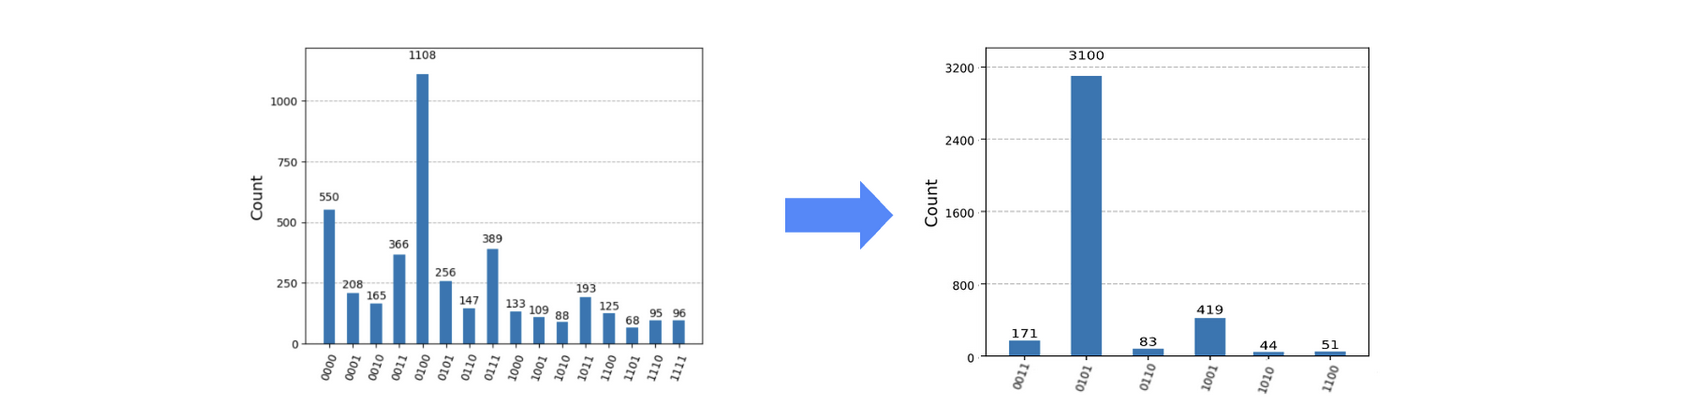

Fig 9. Bitstrings that are initially produced by the LUCJ ansatz circuit (left) and the corrected bitstrings (right)

For example, let's think about a problem that considers up to four spin orbitals for a molecule with two "spin-$\alpha$" and two "spin-$\beta$". If the orbitals are filled from the bottom of energy levels, the quantum state is |0011 0011> as shown in the figure on the lower left.
If the result of running the quantum computer contains |1110 0011> then three "spin-$\beta$" is too many, so one of the bits is flipped from 1 to 0 so that there are two.
Also, if |0011 0001> is observed, one "spin-$\alpha$" is missing, so one of these three electrons is inverted from 0 to 1.

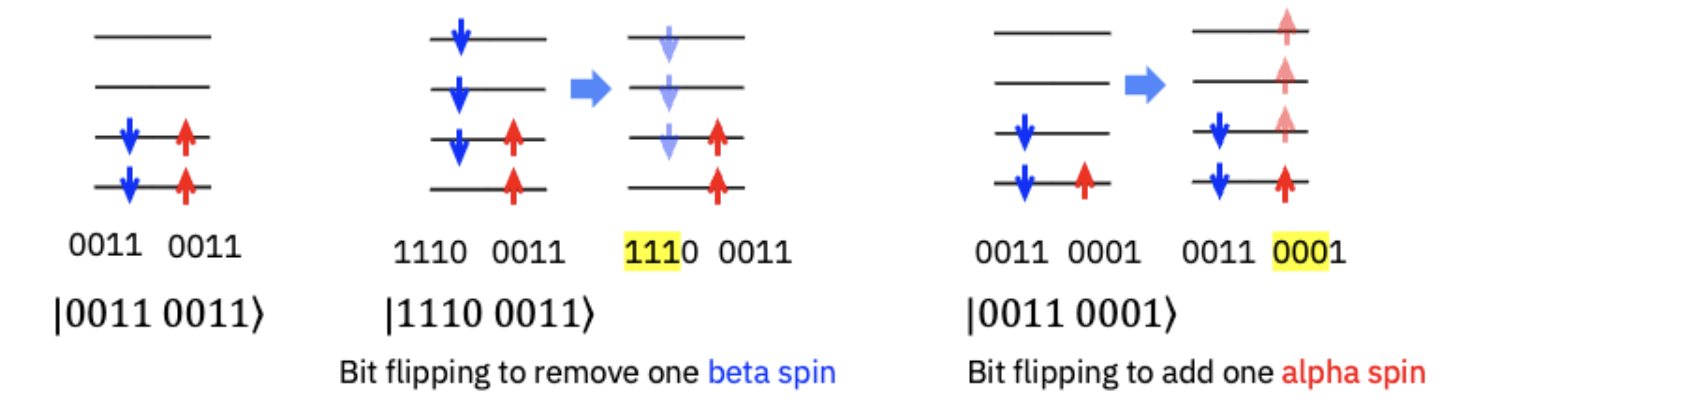

Fig 10. The strings are being corrected based on electron numbers and occupancy expectation with maxim weighted probability

At this time, when choosing which electron to be flipped, the average orbital occupancy is used and flip the bit with the maximum weighted probability of flipping.
The average orbital occupancy is calculated at the end of the configuration recovery loop. So, in the first loop, we don't do this because we don't have an average orbital occupancy, and we discard the sample with the wrong particle numbers.

### Configuration recovery loop 2: Subsample

The next step is to select some from the corrected samples.
This time, we have 100,000 shots, so for example, we randomly select 50 samples from these 5 times, that is, 5 batches. When handling large molecules in batches, this part can be computed in parallel on a supercomputer.

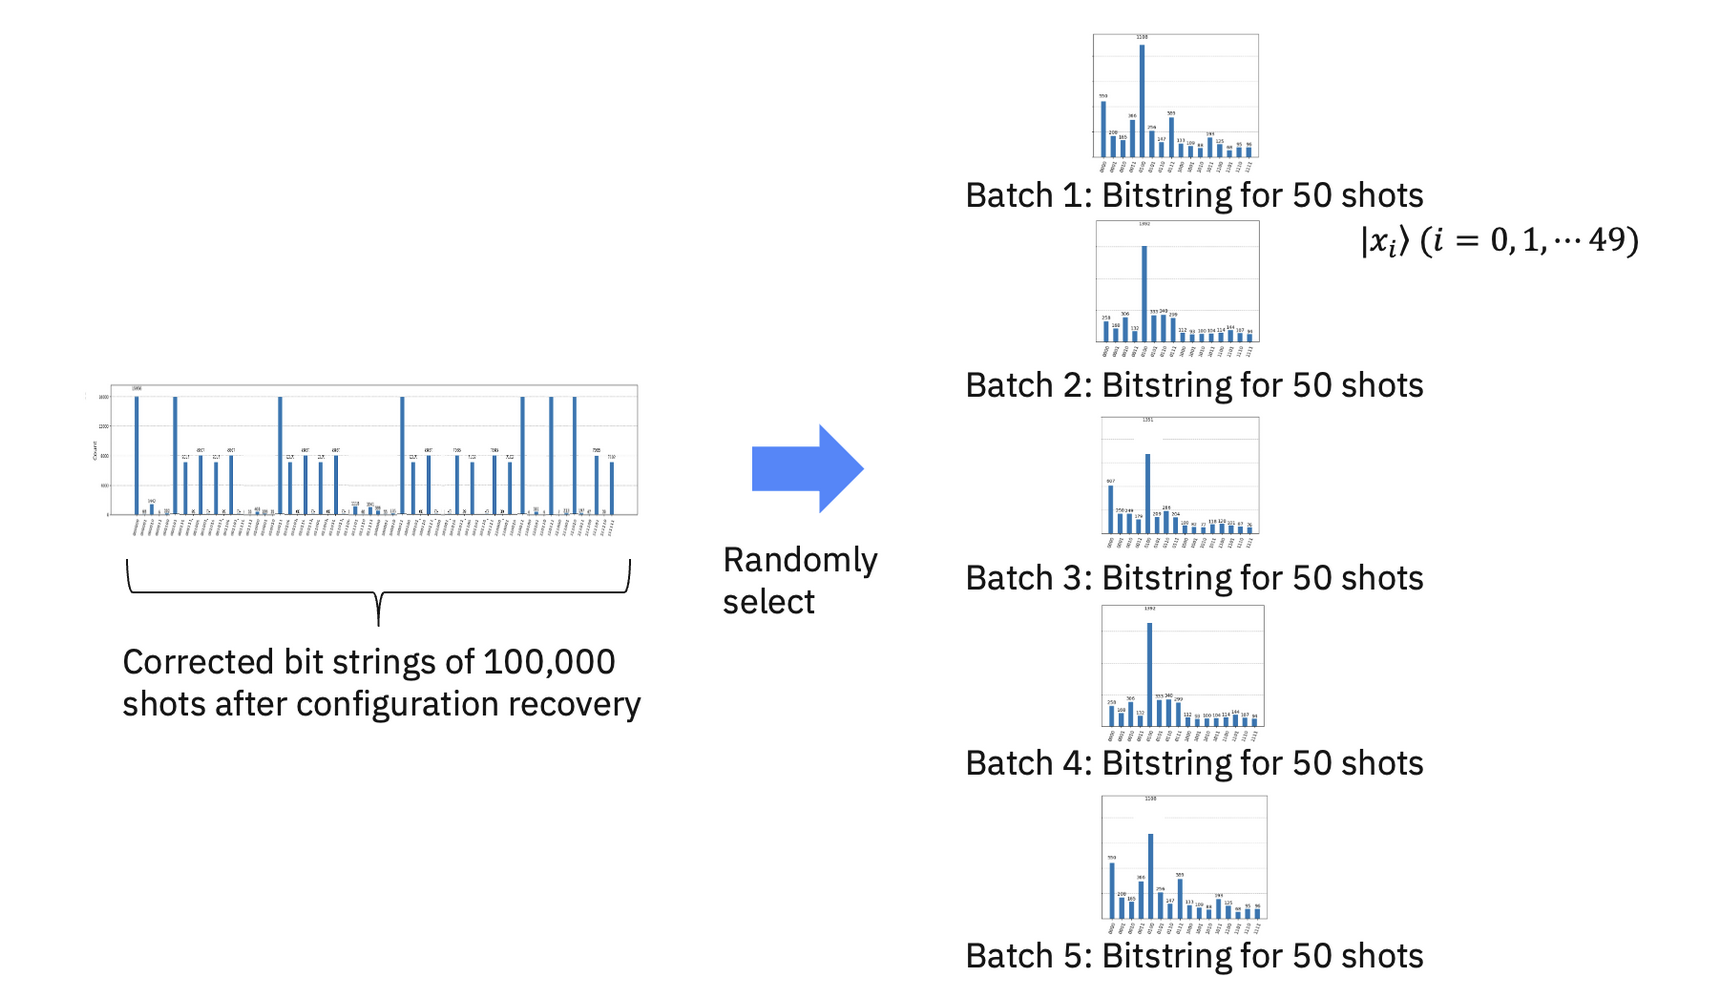

Fig 11. Subsampling from corrected samples

### Configuration recovery loop 3: Diagonalize in subspace

Next is diagonalizing in subspace. In the previous example, the original Hamiltonian $H$, $2^{32}\times2^{32}$ matrix, is projected into the subspace created by $50$ bitstrings, $|x_i\rangle$, and diagonalized.
This projection matrix $P_S$ can have $2^{32}$ different measured bitstrings, from 0...0 to 1...1, but a maximum of $50$ bitstrings can be measured. $P_S$ is a matrix with only $50$ diagonal components and the rest of the matrix with $0$. Therefore, by multiplying $P_S$ by the original Hamiltonian $H$, the projected Hamiltonian $H_s$ has only $50\times50$ components and all other elements are 0. So, we can diagonalize only $50\times50$ matrix instead of the original huge $2^{32}\times2^{32}$ matrix.

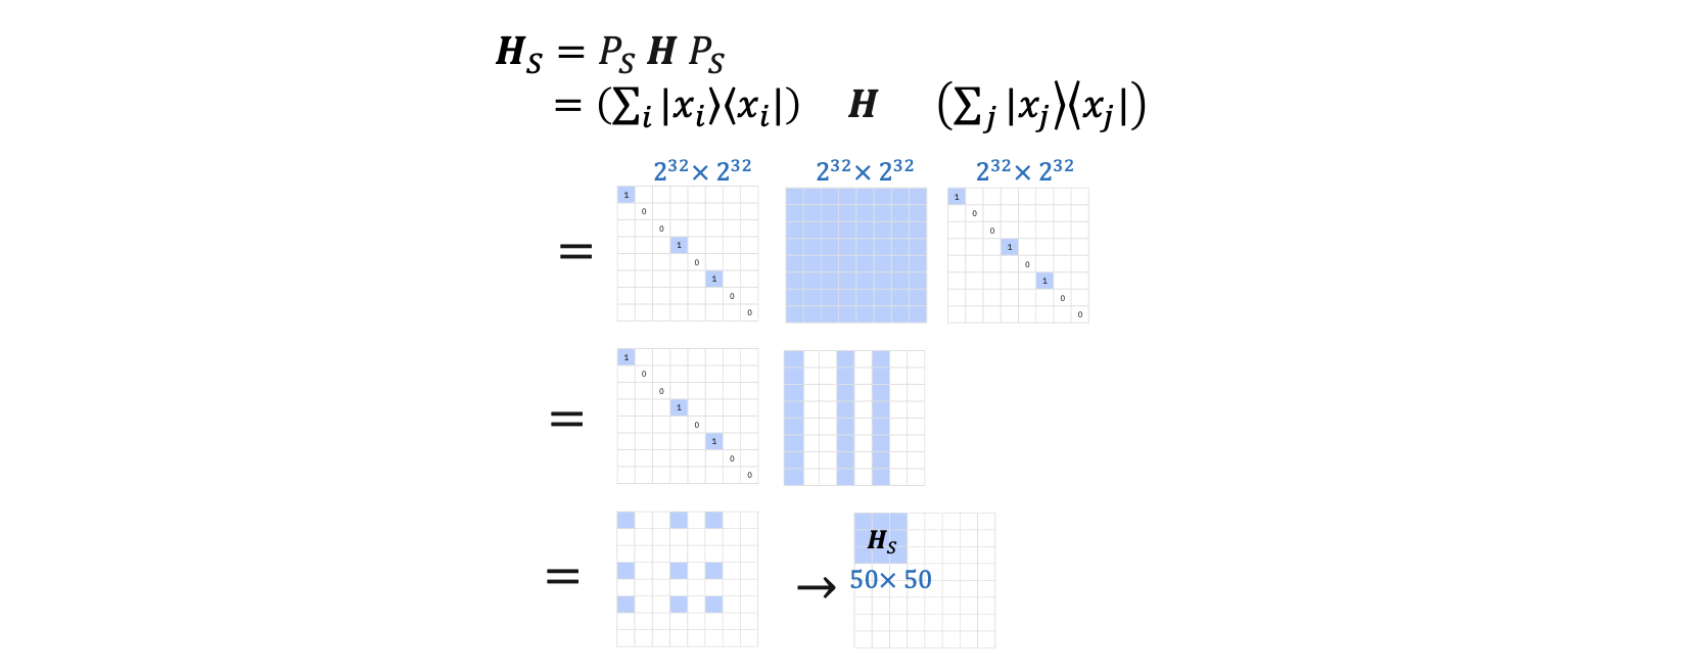

Fig 12. Matrix diagonalization in the subspace

### Configuration recovery loop 4: Find the lowest energy

Finally, from the results of all batches, we obtain an estimate of the average orbital occupancy, and the lowest energy as an estimate of the ground state. And update these data.

## Qiskit patterns

We implement a Qiskit patterns showing how SQD process:

1. **Step 1: Map to quantum problem**
    - Generate an ansatz for estimating the ground state
2. **Step 2: Optimize the problem**
    - Transpile the ansatz for the backend
3. **Step 3: Execute experiments**
    - Draw samples from the ansatz using the ``Sampler`` primitive
4. **Step 4: Post-process results**
   - Self-consistent configuration recovery loop
       - Post-process the full set of bitstring samples, using prior knowledge of particle number and the average orbital occupancy calculated on the most recent iteration.
       - Probabilistically create batches of subsamples from recovered bitstrings.
       - Project and diagonalize the molecular Hamiltonian over each sampled subspace.
       - Save the minimum ground state energy found across all batches and update the avg orbital occupancy.


## Step 1: Map classical inputs to a quantum problem

We will find an approximation to the ground state of the molecule at equilibrium in the 6-31G basis set. First, we specify the molecule and its properties.


In [13]:
warnings.filterwarnings("ignore")

# Specify molecule properties
open_shell = False
spin_sq = 0

# Build N2 molecule
mol = pyscf.gto.Mole()
mol.build(
    atom=[["N", (0, 0, 0)], ["N", (1.0, 0, 0)]],
    basis="6-31g",
    symmetry="Dooh",
)

# Define active space
n_frozen = 2
active_space = range(n_frozen, mol.nao_nr())

# Get molecular integrals
scf = pyscf.scf.RHF(mol).run()
num_orbitals = len(active_space)
n_electrons = int(sum(scf.mo_occ[active_space]))
num_elec_a = (n_electrons + mol.spin) // 2
num_elec_b = (n_electrons - mol.spin) // 2
cas = pyscf.mcscf.CASCI(scf, num_orbitals, (num_elec_a, num_elec_b))
mo = cas.sort_mo(active_space, base=0)
hcore, nuclear_repulsion_energy = cas.get_h1cas(mo)
eri = pyscf.ao2mo.restore(1, cas.get_h2cas(mo), num_orbitals)

# Compute exact energy
exact_energy = cas.run().e_tot

NameError: name 'warnings' is not defined

Before constructing the `LUCJ` ansatz circuit, we first perform a CCSD calculation in the following code cell. The [$t_1$ and $t_2$ amplitudes](https://en.wikipedia.org/wiki/Coupled_cluster#Cluster_operator) from this calculation will be used to initialize the parameters of the ansatz.

In [ ]:
# Get CCSD t2 amplitudes for initializing the ansatz
ccsd = pyscf.cc.CCSD(scf, frozen=[i for i in range(mol.nao_nr()) if i not in active_space]).run()
t1 = ccsd.t1
t2 = ccsd.t2

Now, we use [ffsim](https://github.com/qiskit-community/ffsim) to create the ansatz circuit. Since our molecule has a closed-shell Hartree-Fock state, we use the spin-balanced variant of the UCJ ansatz, [UCJOpSpinBalanced](https://qiskit-community.github.io/ffsim/api/ffsim.html#ffsim.UCJOpSpinBalanced). We pass interaction pairs appropriate for a heavy-hex lattice qubit topology.

In [ ]:
n_reps = 1
alpha_alpha_indices = [(p, p + 1) for p in range(num_orbitals - 1)]
alpha_beta_indices = [(p, p) for p in range(0, num_orbitals, 4)]

ucj_op = ffsim.UCJOpSpinBalanced.from_t_amplitudes(
    t2=t2,
    t1=t1,
    n_reps=n_reps,
    interaction_pairs=(alpha_alpha_indices, alpha_beta_indices),
)

nelec = (num_elec_a, num_elec_b)

# create an empty quantum circuit
qubits = QuantumRegister(2 * num_orbitals, name="q")
circuit = QuantumCircuit(qubits)

# prepare Hartree-Fock state as the reference state and append it to the quantum circuit
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(num_orbitals, nelec), qubits)

# apply the UCJ operator to the reference state
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)
circuit.measure_all()

circuit.decompose().decompose().draw("mpl", fold =-1)

## Step 2: Optimize problem for quantum execution
Next, we optimize the circuit for a target hardware. We'll use the 127-qubit `ibm_brisbane` QPU.

In [ ]:
#service = QiskitRuntimeService(name="qgss-2025")
#backend = service.backend("ibm_brisbane")
# backend selected above

We recommend the following steps to optimize the ansatz and make it hardware-compatible.

* Select physical qubits (`initial_layout`) from the target hardware that adheres to the zig-zag pattern described above. Laying out qubits in this pattern leads to an efficient hardware-compatible circuit with less gates.
* Generate a staged pass manager using the [generate\_preset\_pass\_manager](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.transpiler.generate_preset_pass_manager) function from qiskit with your choice of `backend` and `initial_layout`.
* Set the `pre_init` stage of your staged pass manager to `ffsim.qiskit.PRE_INIT`. `ffsim.qiskit.PRE_INIT` includes qiskit transpiler passes that decompose gates into orbital rotations and then merges the orbital rotations, resulting in fewer gates in the final circuit.
* Run the pass manager on your circuit.


In [ ]:
spin_a_layout = [0, 14, 18, 19, 20, 33, 39, 40, 41, 53, 60, 61, 62, 72, 81, 82]
spin_b_layout = [2, 3, 4, 15, 22, 23, 24, 34, 43, 44, 45, 54, 64, 65, 66, 73]
initial_layout = spin_a_layout + spin_b_layout

pass_manager = generate_preset_pass_manager(
    optimization_level=3, backend=backend, initial_layout=initial_layout
)

# We will use the circuit generated by this pass manager for hardware execution
pass_manager.pre_init = ffsim.qiskit.PRE_INIT
isa_circuit = pass_manager.run(circuit)
print(f"Gate counts (w/ pre-init passes): {isa_circuit.count_ops()}")

## Step 3: Execute using Qiskit Primitives

After optimizing the circuit for hardware execution, we are ready to run it on the target hardware and collect samples for ground state energy estimation. 

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** We have commented out the code for running the circuit on a QPU and left it for the user's reference. Instead of running on real hardware in this walkthrough, we will just read in 100k samples drawn from ``ibm_brisbane`` at an earlier time.

</div>

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit], shots=10_000)
primitive_result = job.result()
pub_result = primitive_result[0]
bit_array = pub_result.data.meas

#bit_array = np.load('utils/N2_device_bitarray.npy', allow_pickle=True).item()

## Step 4: Post-process and return result to desired classical format

Recall that the self-consistent configuration recovery is an iterative procedure that runs in a loop. In the following code cell, the first iteration of the loop simply uses the raw samples (after post-selection on symmetries) as input to the diagonalization procedure to obtain an estimate of the average orbital occupancies. Later iterations of the loop use these occupancies to generate new configurations from raw samples that violate the symmetries. These configurations are collected and then subsampled to produce batches of configurations, which are then used to project the Hamiltonian and compute a ground state estimate with an eigenstate solver.

There are a few user-controlled options which are important for this technique:

* `max_iterations`: Number of iterations of the self-consistent recovery loop.
* `num_batches`: Number of batches of configurations to subsample (this will be the number of separate calls to the eigenstate solver)
* `samples_per_batch`: Number of unique configurations to include in each batch
* `max_cycles`: Maximum number of Davidson cycles run by the eigenstate solver


<div class="alert alert-block alert-warning">
<b>Warning: 5 minutes needed</b>

When running the code below it will take up to 5 minutes (depending on your computer) to execute and will block this notebook for this time. 

</div>

In [ ]:
%%time
# SQD options
energy_tol = 1e-3  
occupancies_tol = 1e-3 
max_iterations = 5

# Eigenstate solver options
num_batches = 5
samples_per_batch = 50
symmetrize_spin = True 
carryover_threshold = 1e-4 
max_cycle = 200
rng = np.random.default_rng(24)


# Pass options to the built-in eigensolver. If you just want to use the defaults,
# you can omit this step, in which case you would not specify the sci_solver argument
# in the call to diagonalize_fermionic_hamiltonian below.
sci_solver = partial(solve_sci_batch, spin_sq=0.0, max_cycle=max_cycle)


# List to capture intermediate results
result_history = [] 

def callback(results: list[SCIResult]): 
    result_history.append(results)
    iteration = len(result_history)
    print(f"Iteration {iteration}")
    for i, result in enumerate(results):
        print(f"\tSubsample {i}")
        print(f"\t\tEnergy: {result.energy + nuclear_repulsion_energy}")
        print(f"\t\tSubspace dimension: {np.prod(result.sci_state.amplitudes.shape)}")

result = diagonalize_fermionic_hamiltonian(
    hcore,
    eri,
    bit_array,
    samples_per_batch=samples_per_batch,
    norb=num_orbitals,
    nelec=nelec,
    num_batches=num_batches,
    energy_tol=energy_tol,
    occupancies_tol=occupancies_tol,
    max_iterations=max_iterations,
    sci_solver=sci_solver,
    symmetrize_spin=symmetrize_spin,
    carryover_threshold=carryover_threshold,
    callback=callback,
    seed=rng,
)

## Visualize the results

To see the result, we first create a function `plot_energy_and_occupancy`.


In [ ]:
def plot_energy_and_occupancy(result_history, exact_energy):

    # Data for energies plot
    x1 = range(len(result_history))
    min_e = [
        min(result, key=lambda res: res.energy).energy + nuclear_repulsion_energy
        for result in result_history
    ]
    e_diff = [abs(e - exact_energy) for e in min_e]
    yt1 = [1.0, 1e-1, 1e-2, 1e-3, 1e-4]
    
    # Chemical accuracy (+/- 1 milli-Hartree)
    chem_accuracy = 0.001
    
    # Data for avg spatial orbital occupancy
    y2 = np.sum(result.orbital_occupancies, axis=0)
    x2 = range(len(y2))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot energies
    axs[0].plot(x1, e_diff, label="energy error", marker="o")
    axs[0].set_xticks(x1)
    axs[0].set_xticklabels(x1)
    axs[0].set_yticks(yt1)
    axs[0].set_yticklabels(yt1)
    axs[0].set_yscale("log")
    axs[0].set_ylim(1e-4)
    axs[0].axhline(y=chem_accuracy, color="#BF5700", linestyle="--", label="chemical accuracy")
    axs[0].set_title("Approximated Ground State Energy Error vs SQD Iterations")
    axs[0].set_xlabel("Iteration Index", fontdict={"fontsize": 12})
    axs[0].set_ylabel("Energy Error (Ha)", fontdict={"fontsize": 12})
    axs[0].legend()
    
    # Plot orbital occupancy
    axs[1].bar(x2, y2, width=0.8)
    axs[1].set_xticks(x2)
    axs[1].set_xticklabels(x2)
    axs[1].set_title("Avg Occupancy per Spatial Orbital")
    axs[1].set_xlabel("Orbital Index", fontdict={"fontsize": 12})
    axs[1].set_ylabel("Avg Occupancy", fontdict={"fontsize": 12})
    
    print(f"Exact energy: {exact_energy:.5f} Ha")
    print(f"SQD energy: {min_e[-1]:.5f} Ha")
    print(f"Absolute error: {e_diff[-1]:.5f} Ha")
    plt.tight_layout()
    plt.show()

In [ ]:
plot_energy_and_occupancy(result_history, exact_energy)

The first plot shows that after a couple of iterations we estimate the ground state energy within `~100 mH` (chemical accuracy is typically accepted to be `1 kcal/mol` $\approx$ `1.6 mH`). The energy can be improved by drawing more samples from the circuit or increasing the number of samples per batch.

The second plot shows the average occupancy of each spatial orbital after the final iteration. We can see that both the spin-up and spin-down electrons occupy the first five orbitals with high probability in our solutions.

<a id="exercise_2"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 2: Flip a bit by configuration recovery</b> 

In a problem in which an $N_2$ molecule is prepared using the STO-3G basis set, we perform configuration recovery. When the average orbital occupancy $n$ is as follows, we will correct the bitstring $x$ as follows. What bitstring is most likely to be modified to?

$n = [0.007, 0.029, 0.029, 0.995, 
     0.976, 0.976, 0.993, 0.997, 
     0.007, 0.029, 0.029, 0.995,
     0.976, 0.976, 0.993, 0.997]$

$x = [1, 0, 0, 0,  1, 0, 1, 1,  1, 0, 1, 1,  1, 1, 0, 0]$

A weighted probability of flipping $w(y)$ using a modified ReLU function is calculated as follows from [2]. 
$$
\begin{align}
    w(y) = \begin{cases} 
    \delta\cdot \frac{y}{h} & \text{if }  y \leq h\\ 
    \delta + (1 - \delta)\cdot \frac{y - h}{1 - h} & \text{if } y > h
\end{cases}
\end{align}
$$ 

Here, $y$ is a probability of flipping, and defined as $y[i] =|x[i]-n[i]|$ for the $i$ -th spin orbital. $h$ defines the location of the "corner" of the ReLU function, and the parameter $\delta$ defines the value of the ReLU function at the corner. We use $\delta = 0.01$, same as [2], and $h = $number of alpha(or beta) particles$/$number of alpha(or beta) spin orbitals$ = N/M$ (filling factor).

In the actual configuration recovery, a bit is randomly inverted with a weight of $w(y)$. In this exercise, answer the result of inverting the bit $i$ with the largest $w(y[i])$ as the bitstring with the highest probability of obtaining.


Note: 
- The right half of a bitstring represents spin-up orbitals, and the left half represents spin-down orbitals. A `1` means the orbital is occupied by an electron, and a `0` means the orbital is empty.
- Please refer to the section ["4.1 Configuration recovery overview" in Lesson 4: SQD application](https://quantum.cloud.ibm.com/learning/en/courses/quantum-diagonalization-algorithms/sqd-implementation) of "Quantum Diagonalization Algorithm" of IBM Quantum Learning.
- In this case, one more beta particle is needed, so if the i-th orbital is already occupied and need not to be flipped, you set its y_beta[i] to 0.

In [ ]:
n = [0.007, 0.029, 0.029, 0.995, 
     0.976, 0.976, 0.993, 0.997, 
     0.007, 0.029, 0.029, 0.995,
     0.976, 0.976, 0.993, 0.997]

x = [1, 0, 0, 0,  1, 0, 1, 1,  1, 0, 1, 1,  1, 1, 0, 0]

In [ ]:
x = np.array(x)
n = np.array(n)

# ---- TODO : Task 2 ---

# Divide into alpha spin and beta spin
x_alpha = x[8:16]
x_beta = x[0:8]

# probability of flipping
y = np.abs(x - n)
y_alpha = y[8:16]
y_beta = y[0:8]

# In this case, one more beta particle is needed, so set y_beta[i] to 0 if x_beta[i] is already 1. 
for i in range(len(y_beta)):
    if x_beta[i] == 1:
        y_beta[i] = 0

# --- End of TODO ---

print(y_beta)

In [ ]:
h = 5/8
delta = 0.01
w = np.zeros(len(y_beta))

# find the maximum w
# ---- TODO : Task 2 ---
for i in range(len(y_beta)):
    if y_beta[i] <= h:
        w[i] = delta*y_beta[i]/h
    else:
        w[i] =delta + (1-delta)*(y_beta[i]-h)/(1-h)
print(w)
max_w = np.max(w)
max_index = np.argmax(w)
print(max_index, max_w)

# --- End of TODO ---
# print(max_index, max_w)

In [ ]:
# Flip the bit of the index with the largest w
# ---- TODO : Task 2 ---
for i in range(len(y_beta)):
    if i == max_index:
        x_beta[i] = 1

x = np.concatenate([x_beta, x_alpha])
corrected_x = x.tolist()
# --- End of TODO ---
# print(corrected_x)

In [ ]:
# Submit your answer using following code

#grade_lab3_ex2(corrected_x) # Expected result type: list

## 5.1 Change basis set

First, let's try to model the molecule in a more natural way by changing the basis set of the molecule to account for more electron orbitals. Incorporating more orbitals into the calculation will increase the computational complexity, but should lower the value of the energy estimation.

<a id="exercise_3"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 3: Change basis set</b> 

Change the basis set from `6-31G` to `cc-pvdz`. How many qubits are needed if we use the LUCJ ansatz with **6** ancillary qubits in case we use `ibm_torino` as a backend?     
Note: Because of the geometric limitation of `ibm_torino`, the number of ancillary qubits is limited to 6 here.

</div>

In [ ]:
warnings.filterwarnings("ignore")

# Specify molecule properties
open_shell = False
spin_sq = 0

# Build N2 molecule
mol = pyscf.gto.Mole()
mol.build(
    atom=[["N", (0, 0, 0)], ["N", (1.0, 0, 0)]],
    # ---- TODO : Task 3 ---
    basis= 'cc-pvdz', ### input your code here ###,
    # --- End of TODO ---
    symmetry="Dooh",
)

# Define active space
n_frozen = 2
active_space = range(n_frozen, mol.nao_nr())

# Get molecular integrals
scf = pyscf.scf.RHF(mol).run()
num_orbitals = len(active_space)
n_electrons = int(sum(scf.mo_occ[active_space]))
num_elec_a = (n_electrons + mol.spin) // 2
num_elec_b = (n_electrons - mol.spin) // 2
cas = pyscf.mcscf.CASCI(scf, num_orbitals, (num_elec_a, num_elec_b))
mo = cas.sort_mo(active_space, base=0)
hcore, nuclear_repulsion_energy = cas.get_h1cas(mo)
eri = pyscf.ao2mo.restore(1, cas.get_h2cas(mo), num_orbitals)

print(num_orbitals)

In [ ]:
# ---- TODO : Task 3 ---
n_qubits = num_orbitals*2 + 6 ### input your result ###
# --- End of TODO ---


In [ ]:
# Submit your answer using following code

#grade_lab3_ex3(n_qubits) # Expected result type: integer

## 5.2 Select the best layout

Now that we have obtained the number of qubits, the next step is to determine the layout of the physical qubits. To use a larger basis, we will use a Heron device with better performance.

<a id="exercise_4"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 4: Select the best layout</b> 

Which qubits should we choose as the initial placement to get the best results? To select the qubits, you need to check the errors of each qubit. In the following map, qubits with a readout error greater than 0.1 are shown in black, and edges with a CZ error greater than 0.1 are shown in white. Answer the best `initial_layout`, which is used as an argument of pass_manger to create the ISA circuit.    
We will use `ibm_torino` as a backend. Because of the geometric limitation of `ibm_torino`, the number of ancillary qubits limit to 6 here.

Select the best initial qubit layout to get better sampling by following:
1. List the qubits with a readout error of 0.1 or more as `bad_readout_qubits` from `backend_target`.
2. List of edges with a CZ error of 0.1 or more as `bad_czgate_edges` from `backend_target`.
3. Display the coupling map with `bad_readout_qubits` in black and `bad_czgate_edges` in white.
4. Select the best initial qubit layout.


</div>

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** **You need to use the preloaded pickle file `backend_target_v20.pkl` or `backend_target_v21.pkl` as `backend_target` for backend information in order to pass the grader of this exercise**. In Lab 2, we used `backend.properties()`, `backend.target`, etc., but we won’t use them this time. We have commented out the code for a real backend a for the user's reference.  

</div>

In [ ]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# service = QiskitRuntimeService(name="qgss-2025")
# backend = service.backend('ibm_torino') 
backend_target = backend.target

In [ ]:
#backend = service.backend('ibm_torino') 
# backend already defined above

In [ ]:
import qiskit
print(f'Qiskit: {qiskit.__version__}')

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** If you are using Qiskit version 2.1.x, open `backend_target_v21.pkl` in the next cell. 
</div>

In [ ]:
# for Qiskit version 2.0.x users
#with open("utils/backend_target_v20.pkl", "rb") as f:
# for Qiskit version 2.1.x users

#with open("utils/backend_target_v21.pkl", "rb") as f:
#    backend_target = pickle.load(f)

Note: Please refer ["Instruction properties" part of "Get QPU information with Qiskit"](https://quantum.cloud.ibm.com/docs/en/guides/get-qpu-information#instruction-properties) to get the properties like "measure" and "cz" from `backend_target`.

In [ ]:
BAD_READOUT_ERROR_THRESHOLD = 0.1
BAD_CZGATE_ERROR_THRESHOLD = 0.1
backend_num_qubits = 133

# ---- TODO : Task 4 ---
bad_readout_qubits = [q for q in range(backend_num_qubits) if backend_target["measure"][(q, )].error > BAD_READOUT_ERROR_THRESHOLD]### build your code here ###
bad_czgate_edges = [qpair for qpair in backend_target["cz"] if backend_target["cz"][qpair].error > BAD_CZGATE_ERROR_THRESHOLD]### build your code here ###
# --- End of TODO ---
print("Bad readout qubits:", bad_readout_qubits)
print("Bad CZ gates:", bad_czgate_edges)


<div class="alert alert-block alert-warning">
<b>Warning: Graphviz Library needed</b>

The 'Graphviz' library is required to use 'plot_coupling_map'.  To install, follow the instructions at:


https://graphviz.org/download 


If you dont want to install it, you can just skip the next block of code, it is only needed for visualization. 

</div>

In [ ]:
qubit_color = []
for i in range(backend_num_qubits):
    if i in bad_readout_qubits:
        qubit_color.append("#000000") #black
    else:
        qubit_color.append("#8c00ff") #purple
line_color = []
for e in backend_target.build_coupling_map().get_edges():
    if e in bad_czgate_edges:
        line_color.append("#ffffff") #white
    else:
        line_color.append("#888888") #gray
plot_gate_map(backend, qubit_color=qubit_color, line_color=line_color, qubit_size=50, font_size=25, figsize=(14,14))

In [ ]:
# select the initial layout
# ---- TODO : Task 4 ---
spin_a_layout = [2,3,4,16,23,24,25,35,44,45,46,55,65,66,67,74,86,87,88,94,107,108,109,113,128,127] ### add your qubits list ###
spin_b_layout = [0,15,19,20,21,34,40,41,42,54,61,62,63,73,82,83,84,93,103,104,105,112,124,123,122,121] ### add your qubits list ###
# --- End of TODO ---
initial_layout = spin_a_layout + spin_b_layout

Check your layout here:

In [ ]:
qubit_color = []
for i in range(backend_num_qubits):
    if i in bad_readout_qubits:
        qubit_color.append("#000000") #black
    elif i in initial_layout:
        qubit_color.append("#ff00dd") #pink
    else:
        qubit_color.append("#8c00ff") #purple
line_color = []
for e in backend_target.build_coupling_map().get_edges():
    if e in bad_czgate_edges:
        line_color.append("#ffffff") #white
    else:
        line_color.append("#888888") #gray
plot_gate_map(backend, qubit_color=qubit_color, line_color=line_color, qubit_size=50, font_size=25, figsize=(14,14))

In [ ]:
# Submit your answer using following code

#grade_lab3_ex4(initial_layout) # Expected result type: lists

## 5.3 Add more interaction to LUCJ ansatz

The LUCJ ansatz used in section 4 has the form

$$
  \lvert \Psi \rangle = \prod_{\mu=1}^L e^{\hat{K}_\mu} e^{i \hat{J}_\mu} e^{-\hat{K}_\mu} | \Phi_0 \rangle
$$

where $\lvert \Phi_0 \rangle$ is a reference state, often taken to be the Hartree-Fock state, and the$\hat{K}_\mu$ and $\hat{J}_\mu$ have the form

$$
\hat{K}_\mu = \sum_{pq, \sigma} K_{pq}^\mu \, \hat{a}^\dagger_{p \sigma} \hat{a}^{\phantom{\dagger}}_{q \sigma}
\;,\;
\hat{J}_\mu = \sum_{pq, \sigma\tau} J_{pq,\sigma\tau}^\mu \, \hat{n}_{p \sigma} \hat{n}_{q \tau}
\;,
$$

where we have defined the number operator

$$
\hat{n}_{p \sigma} = \hat{a}^\dagger_{p \sigma} \hat{a}^{\phantom{\dagger}}_{p \sigma}.
$$

The IBM hardware has a heavy-hex lattice qubit topology, and it yields the following index constraints on the $\mathbf{J}$ matrices:


$$
\begin{align*}
\mathbf{J}^{\alpha\alpha} &: \{(p, p+1) \; , \; p = 0, \ldots, N-2\} \\
\mathbf{J}^{\alpha\beta} &: \{(p, p) \;, \; p = 0, 4, 8, \ldots,\; p \leq N-1\}
\end{align*}
$$
Here, $\mathbf{J}^{\alpha\alpha}= J_{p q,\alpha\alpha}^1$ and $\mathbf{J}^{\alpha\beta}= J_{p q,\alpha\beta}^1$.

In this case, $\mathbf{J}^{\alpha\alpha}$ only interacts with adjacent spins on the $\alpha$ or $\beta$ orbit. This time, to model close to nature, let's change $\mathbf{J}^{\alpha\alpha}$ so that the interaction also works with the next adjacent spin.


$$
\begin{align*}
\mathbf{J}^{\alpha\alpha} &: \{(p, p+1, p+2) \; , \; p = 0, \ldots, N-3\} \\
\mathbf{J}^{\alpha\beta} &: \{(p, p) \;, \; p = 0, 4, 8, \ldots,\; p \leq N-1\}
\end{align*}
$$

<a id="exercise_5"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 5: Add more interaction to LUCJ ansatz</b> 

In the LUCJ ansatz, modify the code of `alpha_alpha_indices` so that the $\mathbf{J}$ matrix interacts not only with adjacent spins on the $\alpha$ or $\beta$ orbit, but also with spins two steps ahead. Submit the list of `alpha_alpha_indices`.
</div>

In [ ]:
# Get CCSD t2 amplitudes for initializing the ansatz
ccsd = pyscf.cc.CCSD(scf, frozen=[i for i in range(mol.nao_nr()) if i not in active_space]).run()
t1 = ccsd.t1
t2 = ccsd.t2

n_reps = 1
# ---- TODO : Task 5 ---
alpha_alpha_indices_1 = [(p, p + 1) for p in range(num_orbitals - 1)]
alpha_alpha_indices_2 = [(p, p + 2) for p in range(num_orbitals - 2)]
alpha_alpha_indices = alpha_alpha_indices_1 + alpha_alpha_indices_2 ## input your code here ###
# --- End of TODO ---
alpha_beta_indices = [(p, p) for p in range(0, num_orbitals, 4)]

ucj_op = ffsim.UCJOpSpinBalanced.from_t_amplitudes(
    t2=t2,
    t1=t1,
    n_reps=n_reps,
    interaction_pairs=(alpha_alpha_indices, alpha_beta_indices),
)

nelec = (num_elec_a, num_elec_b)

# create an empty quantum circuit
qubits = QuantumRegister(2 * num_orbitals, name="q")
circuit = QuantumCircuit(qubits)

# prepare Hartree-Fock state as the reference state and append it to the quantum circuit
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(num_orbitals, nelec), qubits)

# apply the UCJ operator to the reference state
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)
circuit.measure_all()
circuit.decompose().decompose().draw("mpl", fold=-1)

In [ ]:
# Submit your answer using following code

#grade_lab3_ex5(alpha_alpha_indices) # Expected result type: list[tuple[int, int]]

Congratulations! You finished this lab. The next session is a bonus session and does not count towards your score.

In [ ]:
#service = QiskitRuntimeService(name="qgss-2025")
#backend = service.backend('ibm_torino')
# Backend defined above

In [ ]:
pass_manager = generate_preset_pass_manager(
    optimization_level=3, backend=backend, initial_layout=initial_layout
)

# We will use the circuit generated by this pass manager for hardware execution
pass_manager.pre_init = ffsim.qiskit.PRE_INIT
isa_circuit = pass_manager.run(circuit)
print(f"Gate counts (w/ pre-init passes): {isa_circuit.count_ops()}")

In [ ]:
opts = SamplerOptions()
opts.dynamical_decoupling.enable = True
opts.twirling.enable_measure = True

sampler = Sampler(mode=backend, options=opts)
job = sampler.run([isa_circuit], shots=100_000)
print("job id:", job.job_id())
job.status()

In [ ]:
job.status()

In [ ]:
#service = QiskitRuntimeService(name="qgss-2025")

# Get job id from cell above
#job = service.job('INPUT-YOUR-JOB-ID')
job = service.job('d4s04hu07q7s73eo49jg')


In [ ]:
job.status()

<div class="alert alert-block alert-warning">
<b>Warning: 20 minutes needed</b>

When running the code below it will take up to 20 minutes (depending on your computer) to execute and will block this notebook for this time. 

</div>

In [ ]:
%%time
primitive_result = job.result()
pub_result = primitive_result[0]
bit_array = pub_result.data.meas

# SQD options
energy_tol = 1e-3 
occupancies_tol = 1e-3 
max_iterations = 3

# Eigenstate solver options
num_batches = 3
samples_per_batch = 200
symmetrize_spin = True 
carryover_threshold = 1e-4 
max_cycle = 200

# Pass options to the built-in eigensolver. If you just want to use the defaults,
# you can omit this step, in which case you would not specify the sci_solver argument
# in the call to diagonalize_fermionic_hamiltonian below.
sci_solver = partial(solve_sci_batch, spin_sq=0.0, max_cycle=max_cycle) ###NEW###

# List to capture intermediate results
result_history = [] 

def callback(results: list[SCIResult]): 
    result_history.append(results)
    iteration = len(result_history)
    print(f"Iteration {iteration}")
    for i, result in enumerate(results):
        print(f"\tSubsample {i}")
        print(f"\t\tEnergy: {result.energy + nuclear_repulsion_energy}")
        print(f"\t\tSubspace dimension: {np.prod(result.sci_state.amplitudes.shape)}")

result = diagonalize_fermionic_hamiltonian(
    hcore,
    eri,
    bit_array,
    samples_per_batch=samples_per_batch,
    norb=num_orbitals,
    nelec=nelec,
    num_batches=num_batches,
    energy_tol=energy_tol,
    occupancies_tol=occupancies_tol,
    max_iterations=max_iterations,
    sci_solver=sci_solver,
    symmetrize_spin=symmetrize_spin,
    carryover_threshold=carryover_threshold,
    callback=callback,
    seed=rng,
)

In [ ]:
exact_energy=-109.2177884189209 # CCSD energy
plot_energy_and_occupancy(result_history, exact_energy)

In [ ]:
#ENV Used
from platform import python_version
print("Python Version ", python_version())
! pip freeze | grep qiskit
! pip freeze | grep python
#! pip freeze | grep jupyter

# Reference 
Provide References as below

\[1] M. Motta et al., “Bridging physical intuition and hardware efficiency for correlated electronic states: the local unitary cluster Jastrow ansatz for electronic structure” (2023). [Chem. Sci., 2023, 14, 11213](https://pubs.rsc.org/en/content/articlehtml/2023/sc/d3sc02516k)

\[2] J. Robledo-Moreno et al., "Chemistry Beyond Exact Solutions on a Quantum-Centric Supercomputer" (2024). [arXiv:quant-ph/2405.05068](https://arxiv.org/abs/2405.05068).

# Additional information

**Created by:** 

**Advised by:** 

**Reviewed by:** 

**Version:** 1.0

# Qiskit packages versions and Other ENV Details 

In [16]:
import qiskit
import qiskit_ibm_runtime
print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')
from platform import python_version
print("Python Version ", python_version())

Qiskit: 2.1.2
Qiskit IBM Runtime: 0.43.1
Python Version  3.11.13


In [17]:

! pip freeze | grep qiskit
! pip freeze | grep python
#! pip freeze | grep jupyter

qc_grader @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git@6e0ab831d1945987a5e64021e4ef6e000116009c
qiskit==2.1.2
qiskit-addon-opt-mapper==0.1.0
qiskit-aer==0.17.2
qiskit-ibm-runtime==0.43.1
qiskit-serverless==0.28.0
dnspython==2.6.1
ipython==8.20.0
mysql-connector-python==9.3.0
python-dateutil==2.9.0.post0
python-docx==1.1.2
python-dotenv==1.0.1
python-json-logger==4.0.0
python-multipart==0.0.19
python-pptx==1.0.2
